In [23]:
import os
import sys

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
DIR_QISKIT_SOURCE_CODE = "data/qiskit-terra-version-0.24.1-commit-e0c061d"
OUTPUT_DATA = "data/qiskit-terra-exceptions.csv"

In [4]:
TEST_FILE = os.path.join(DIR_QISKIT_SOURCE_CODE, "qiskit/compiler/assembler.py")

In [11]:
# scrape for all exceptions in the qiskit source code 
import libcst as cst
from libcst import parse_module
from libcst.metadata import MetadataWrapper
from libcst.metadata import PositionProvider
from libcst.metadata import ParentNodeProvider
from libcst.metadata import ScopeProvider
from libcst.metadata import QualifiedNameProvider
from libcst.metadata import TypeInferenceProvider


class ExceptionVisitor(cst.CSTVisitor):
    def __init__(self):
        self.exceptions = []

    def visit_Raise(self, node: cst.Raise):
        self.exceptions.append(node.exc)


def get_exceptions_from_file(file_path):
    with open(file_path, "r") as file:
        code = file.read()
    module = parse_module(code)
    visitor = ExceptionVisitor()
    module.visit(visitor)
    return visitor.exceptions

# exceptions = get_exceptions_from_file(TEST_FILE)
# # convert AST nodes to strings
# unparsed_exceptions = [
#     cst.Module([]).code_for_node(exception) for exception in exceptions]
# for exception in unparsed_exceptions:
#     print(exception)

QiskitError("bad input to assemble() function; must be either circuits or schedules")
QiskitError(f"memory not supported by backend {backend_config.backend_name}")
QiskitError("Argument 'shots' should be of type 'int'")
QiskitError(
    "Number of shots specified: %s exceeds max_shots property of the "
    "backend: %s." % (shots, max_shots)
)
QiskitError(f"Each element of {lo_type} LO range must be a 2d list.")
QiskitError(
    "Qubit {} {} LO frequency is {}. The range is [{}, {}].".format(
        i, lo_type, freq, freq_range[0], freq_range[1]
    )
)
QiskitError(
    ("meas_level = {} not supported for backend {}, only {} is supported").format(
        meas_level, backend_config.backend_name, backend_config.meas_levels
    )
)
QiskitError(
    "Backend rep_delay_range {} must be a list with two entries.".format(
        rep_delay_range
    )
)
QiskitError(
    "Supplied rep delay {} not in the supported "
    "backend range {}".format(rep_delay, rep_delay_range)
)
QiskitError(
    

In [15]:


def convert_exception_to_string(exception):
    """Convert an AST node back to its code text string."""
    try:
        return cst.Module([]).code_for_node(exception)
    except:
        return ""


def get_exceptions_from_dir(dir_path):
    all_exceptions_with_file = []
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            if file.endswith(".py"):
                file_exceptions = \
                    get_exceptions_from_file(os.path.join(root, file))
                exceptions_data = [
                    {
                        "file": os.path.join(root, file), 
                        "exception": convert_exception_to_string(exception)
                    } for exception in file_exceptions]
                all_exceptions_with_file.extend(exceptions_data)
    return all_exceptions_with_file

all_exceptions_with_file_records = \
    get_exceptions_from_dir(DIR_QISKIT_SOURCE_CODE)

df = pd.DataFrame.from_records(all_exceptions_with_file_records)
df.head()


,file,exception
0,data/qiskit-terra-version-0.24.1-commit-e0c061...,"QiskitError(""Must supply QuantumCircuit to sch..."
1,data/qiskit-terra-version-0.24.1-commit-e0c061...,"QiskitError(""Invalid backend type %s"" % type(b..."
2,data/qiskit-terra-version-0.24.1-commit-e0c061...,"QiskitError(\n ""The parameters pass_manager..."
3,data/qiskit-terra-version-0.24.1-commit-e0c061...,"exceptions.QiskitUserConfigError(\n ""%s is ..."
4,data/qiskit-terra-version-0.24.1-commit-e0c061...,"exceptions.QiskitUserConfigError(\n f""'{sta..."


In [19]:
if not os.path.exists(OUTPUT_DATA):
    df.to_csv(OUTPUT_DATA, index=False)
else:
    print(f"File {OUTPUT_DATA} already exists, skipping.")

File data/qiskit-terra-exceptions.csv already exists, skipping.


In [20]:
df = pd.read_csv(OUTPUT_DATA)

In [21]:
# count how many have the "exeption" column as empty string
df["exception"].value_counts()

exception
NotImplementedError                                                                                                                      134
AttributeError(f"module '{__name__}' has no attribute '{name}'")                                                                          47
NotImplementedError()                                                                                                                     10
AttributeError(f"Attribute {name} is not defined")                                                                                         8
exceptions.QpyError(\n    f"Object type '{type(obj)}' is not supported in {cls.__name__} namespace."\n)                                    8
                                                                                                                                        ... 
QasmError('Invalid syntax, missing ";" at line', str(lineno))                                                                              1
Qas

In [22]:
# remove all uninteresting exceptions
UNINTERESTING_EXCEPTIONS = [
    "NotImplementedError",
    "NotImplementedError()",
    '''AttributeError(f"module '{__name__}' has no attribute '{name}'")''',
    '''AttributeError(f"Attribute {name} is not defined")'''
]
df = df[~df["exception"].isin(UNINTERESTING_EXCEPTIONS)]

exception
exceptions.QpyError(\n    f"Object type '{type(obj)}' is not supported in {cls.__name__} namespace."\n)                                                       8
SentinelException                                                                                                                                             7
QiskitError("other is not a number")                                                                                                                          7
AlgorithmError("The primitive job failed!")                                                                                                                   6
ValueError("A quantum instance or sampler must be provided.")                                                                                                 6
                                                                                                                                                             ..
QasmError('Invalid syntax, mis

<Axes: xlabel='count', ylabel='prefix'>

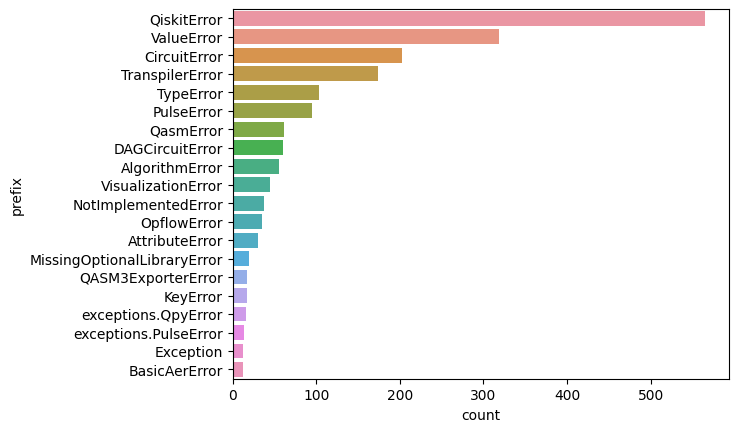

In [24]:
# QasmError('Invalid syntax, missing ";" at line', str(lineno)) -> QasmError
df['prefix'] = df['exception'].str.split('(').str[0]

sns.countplot(
    data=df,
    y="prefix",
    order=df["prefix"].value_counts().iloc[:20].index
)


In [25]:
# print all TranspilerError exceptions
df_transpiler_error = df[df["prefix"] == "TranspilerError"]
for exception in df_transpiler_error["exception"]:
    print(exception)

TranspilerError(
    f"Timing constraint {key} should be nonzero integer. Not {value}."
)
TranspilerError(f"Index to replace {index} does not exists")
TranspilerError(f"Index to replace {index} does not exists")
TranspilerError(
    "%s is not a BasePass or FlowController instance " % pass_.__class__
)
TranspilerError("Recursive definition of StagedPassManager disallowed.")
TranspilerError(
    "A name must be specified when defining a supported global operation by class"
)
TranspilerError(
    "An instruction added globally by class can't have properties set."
)
TranspilerError(
    f"The number of qubits for {instruction} does not match the number "
    f"of qubits in the properties dictionary: {qarg}"
)
TranspilerError(
    f"The specified basis gate: {gate} has {gate_obj.num_qubits} "
    "qubits. This constructor method only supports fixed width operations "
    "with <= 2 qubits (because connectivity is defined on a CouplingMap)."
)
TranspilerError(
    "The fenced %s has the pro

In [ ]:
POSSIBLE_SIGNAL_OF_PROBLEM = [
    'TranspilerError("Maximum iteration reached. max_iteration=',  # https://github.com/Qiskit/qiskit-terra/issues/9177
    'TranspilerError("internal error',  # https://github.com/Qiskit/qiskit-terra/issues/2571
    'TranspilerError("YZY and ZYZ angles do not give same rotation matrix.")', 
]


In [ ]:
# scan all the .qasm files in the current folder and import them
from qiskit import QuantumCircuit
import glob

qasm_files = glob.glob("*.qasm")
for qasm_file in qasm_files:
    print(f"Importing {qasm_file}")
    try:
        qc = QuantumCircuit.from_qasm_file(qasm_file)
    except Exception as e:
        print(f"Exception: {e}")
        print(f"File: {qasm_file}")
        content = open(qasm_file, "r").read()
        print(f"Content:\n{content}")
